In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# load in a bunch of potentially useful files
# loading merged log_tpm_file
# merge together log_tpm_df files
log_tpm_df = pd.read_csv('../data/precise_1.0/log_tpm.csv', index_col = 0)
starve_log_tpm = pd.read_csv('../data/validation_data_sets/stationary_phase/cleaned_log_tpm_qc.csv', index_col = 0)
to_blank_inds = list(set(log_tpm_df.index) - set(starve_log_tpm.index))
# need to create zero rows for missing values
zeros_data = {col : 0 for col in starve_log_tpm.columns}
zeros_df = pd.DataFrame(zeros_data, index = to_blank_inds)
starve_log_tpm = pd.concat([starve_log_tpm, zeros_df])
starve_log_tpm = starve_log_tpm.loc[log_tpm_df.index]
log_tpm_df = pd.concat([starve_log_tpm, log_tpm_df], axis = 1)

iM_to_genes = {}
k_to_iM = {}
f = open('../data/precise_1.0/iM_table.csv', 'r')
lines = f.readlines()
f.close()
k_to_iM = {line.split(',')[0] : line.split(',')[1] for line in lines[1:]}
f = open('../data/precise_1.0/gene_presence_list.csv', 'r')
lines = f.readlines()
f.close()
for line in lines[1:]:
    k = line.split(',')[1]
    iM = k_to_iM[k]
    gene = line.split(',')[2].replace('\n', '')
    if iM not in iM_to_genes:
        iM_to_genes.update({iM : []})
    iM_to_genes[iM].append(gene)

A = pd.read_csv('../data/precise_1.0/A.csv', index_col = 0).rename(index = {int(k) : v for k, v in k_to_iM.items()})
M = pd.read_csv('../data/precise_1.0/M.csv', index_col = 0).rename(columns = {str(k) : v for k, v in k_to_iM.items()})
centered_log_tpm = log_tpm_df.sub(log_tpm_df[['control__wt_glc__1','control__wt_glc__2']].mean(axis=1),axis=0)
all_A = M.T.dot(centered_log_tpm)

all_A.to_csv('../data/validation_data_sets/merged_A.csv')

In [5]:
# currently the identifiers don't map with each other, waiting for Amy response
# but this does bring up a good point, what is this model estimating?
# Kd and cActivator values primarily I suppose, does TF_conc go down/up along with cAMP changes is the goal
# I need a way to do everything from log tpm data really
# TODO - create a pipeline from log tpm to iModulons and everything else to put at front of this if input includes non PRECISE samples
# really not difficult to do, just infer activites by matrix transformation

mapping = {
    'SRX5936089' : 'starve_series__t00_growth1__1', 
    'SRX5936090' : 'starve_series__t00_growth1__2', 
    'SRX5936091' : 'starve_series__t00_growth1__3', 
    'SRX5936092' : 'starve_series__t00_growth1__4', 
    'SRX5936093' : 'starve_series__t01_starve__1', 
    'SRX5936094' : 'starve_series__t01_starve__2', 
    'SRX5936095' : 'starve_series__t02_starve__1', 
    'SRX5936096' : 'starve_series__t02_starve__2', 
    'SRX5936097' : 'starve_series__t03_starve__1', 
    'SRX5936098' : 'starve_series__t03_starve__2', 
    'SRX5936099' : 'starve_series__t04_starve__1', 
    'SRX5936100' : 'starve_series__t04_starve__2', 
    'SRX5936101' : 'starve_series__t05_starve__1', 
    'SRX5936102' : 'starve_series__t05_starve__2', 
    'SRX5936103' : 'starve_series__t06_starve__1', 
    'SRX5936104' : 'starve_series__t06_starve__2', 
    'SRX5936105' : 'starve_series__t07_starve__1', 
    'SRX5936106' : 'starve_series__t07_starve__2', 
    'SRX5936107' : 'starve_series__t08_starve__1', 
    'SRX5936108' : 'starve_series__t08_starve__2', 
    'SRX5936109' : 'starve_series__t09_starve__1', 
    'SRX5936110' : 'starve_series__t09_starve__2', 
    'SRX5936111' : 'starve_series__t10_starve__1', 
    'SRX5936112' : 'starve_series__t10_starve__2', 
    'SRX5936113' : 'starve_series__t11_starve__1', 
    'SRX5936114' : 'starve_series__t11_starve__2', 
    'SRX5936115' : 'starve_series__t12_starve__1', 
    'SRX5936116' : 'starve_series__t12_starve__2', 
    'SRX5936118' : 'starve_series__t14_starve__1', 
    'SRX5936119' : 'starve_series__t14_starve__2', 
    'SRX5936121' : 'starve_series__t16_starve__1', 
    'SRX5936122' : 'starve_series__t16_starve__2', 
    'SRX5936123' : 'starve_series__t17_starve__1', 
    'SRX5936124' : 'starve_series__t17_starve__2', 
    'SRX5936125' : 'starve_series__t18_starve__1', 
    'SRX5936126' : 'starve_series__t18_starve__2', 
    'SRX5936128' : 'starve_series__t20_growth2__1', 
    'SRX5936129' : 'starve_series__t20_growth2__2', 
    'SRX5936130' : 'starve_series__t21_growth2__1', 
    'SRX5936131' : 'starve_series__t21_growth2__2', 
    'SRX5936132' : 'starve_series__t22_growth2__1', 
    'SRX5936133' : 'starve_series__t22_growth2__2', 
    'SRX5936134' : 'starve_series__t23_growth2__1', 
    'SRX5936135' : 'starve_series__t23_growth2__2', 
    'SRX5936137' : 'starve_series__t25_growth2__1', 
    'SRX5936138' : 'starve_series__t25_growth2__2', 
    'SRX5936139' : 'starve_series__t26_growth2__1', 
    'SRX5936140' : 'starve_series__t26_growth2__2', 
    'SRX5936141' : 'starve_series__t27_growth2__1', 
    'SRX5936142' : 'starve_series__t27_growth2__2', 
    'SRX5936143' : 'starve_series__t28_growth2__1', 
    'SRX5936144' : 'starve_series__t28_growth2__2', 
}

In [6]:
# load in, trim samples not included in both data sets
starve_log_tpm = pd.read_csv('../data/validation_data_sets/stationary_phase/project_log_tpm_qc.csv', index_col = 0)
starve_log_tpm = starve_log_tpm.rename(columns = mapping)
starve_log_tpm = starve_log_tpm.drop(columns = ['starve_series__t20_growth2__1', 'starve_series__t20_growth2__2'])
starve_metabs = pd.read_excel('../data/validation_data_sets/stationary_phase/metabolites_data.xlsx', index_col = 0)
starve_metabs = starve_metabs.drop(columns = ['starve_series__t13_starve__1', 'starve_series__t13_starve__2',  'starve_series__t15_starve__1',  'starve_series__t15_starve__2',  'starve_series__t19_starve__1',  'starve_series__t19_starve__2',  'starve_series__t20_starve__1',  'starve_series__t20_starve__2',  'starve_series__t24_growth2__1',  'starve_series__t24_growth2__2',  'starve_series__t29_growth2__1',  'starve_series__t29_growth2__2',  'starve_series__t30_growth2__1',  'starve_series__t30_growth2__2',  'starve_series__t31_growth2__1',  'starve_series__t31_growth2__2',  'starve_series__t32_growth2__1',  'starve_series__t32_growth2__2',  'starve_series__t33_growth2__1',  'starve_series__t33_growth2__2',  'starve_series__t34_growth2__1',  'starve_series__t34_growth2__2'])

In [35]:
# i should average these together realistically...
new_col_to_old_cols = {}
for col in starve_log_tpm:
    new_col = col[:-3]
    if new_col not in new_col_to_old_cols:
        new_col_to_old_cols.update({new_col : []})
    new_col_to_old_cols[new_col].append(col)
new_df = pd.DataFrame(index = starve_log_tpm.index)
old_cols = starve_metabs.columns
for new_col, cols in new_col_to_old_cols.items():
    new_df[new_col] = starve_log_tpm[cols].mean(axis = 1)
    starve_metabs[new_col] = starve_metabs[cols].mean(axis = 1)
save_starve_metabs = starve_metabs[['metabolic subsystem'] + list(new_col_to_old_cols.keys())]
save_starve_log_tpm = new_df
starve_metabs = starve_metabs[old_cols]

In [5]:
# save the trimmed versions
save_starve_log_tpm.to_csv('../data/validation_data_sets/stationary_phase/cleaned_log_tpm_qc.csv')
save_starve_metabs.to_csv('../data/validation_data_sets/stationary_phase/cleaned_metabolites_data.csv')

In [24]:
# generate relative standard deviation dataframe
rsd_df = pd.DataFrame(index = save_starve_metabs.index, columns = save_starve_metabs.columns)
for combo, parts in new_col_to_old_cols.items():
    for metab in rsd_df.index:
        rsd = 100 * np.std(starve_metabs.loc[metab][parts]) / np.mean(starve_metabs.loc[metab][parts])
        rsd_df.at[metab, combo] = rsd
rsd_df['metabolic subsystem'] = starve_metabs['metabolic subsystem']
rsd_df.to_csv('../data/validation_data_sets/stationary_phase/rsd_df.csv')

In [2]:
# calculate iModulons for the new log tpm
A

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
YieP,0.076035,-0.076035,1.483992,1.719034,-1.184220,-1.350203,1.451882,1.329577,0.265718,0.024864,...,-0.892372,-1.022146,0.253722,-0.880352,0.526509,1.261740,1.727782,1.512944,2.584012,2.787686
GlpR,-0.408568,0.408568,1.760680,1.357274,-0.446482,-0.931725,0.517458,0.427993,-0.499529,-0.581335,...,1.781224,2.785099,0.439133,-0.015471,0.366544,0.369589,0.325470,1.027508,1.629269,2.154717
YgbI,0.103912,-0.103912,0.847276,1.530875,0.258492,0.188903,1.232846,0.883215,0.505356,0.132219,...,1.422466,2.396554,2.130935,1.656316,0.864338,0.093698,0.641705,1.306455,1.366912,2.452061
efeU-repair,-0.456843,0.456843,5.890468,6.051415,-0.914670,-1.087245,5.210846,5.028641,3.820172,3.961980,...,-2.343743,-1.991048,3.520794,3.105551,6.620301,5.400225,5.545880,5.555621,9.672308,10.109228
ydcI-KO,0.269057,-0.269057,-0.254271,0.184537,0.651527,0.691914,0.016636,-0.465781,1.212097,1.122801,...,-3.646464,-3.606055,-0.665810,-0.830586,-1.044574,0.119876,-0.045670,-0.826608,-1.393160,-1.587978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FecI,0.688270,-0.688270,5.634716,6.108603,0.219454,0.003060,5.158511,4.370987,3.103733,3.583433,...,7.764427,8.760619,7.821128,7.703410,-2.884336,-2.367138,-4.110394,-3.634405,-0.519113,-1.947274
iron-related,-0.626840,0.626840,-14.701300,-15.597267,0.845967,1.162655,-13.510683,-12.957594,-13.096025,-13.314456,...,0.119792,-0.960111,-0.680352,1.018403,-6.899176,-5.952147,-9.010493,-8.105965,1.585767,1.073398
RbsR,0.430457,-0.430457,-3.372701,-4.162934,0.068287,-0.165654,-2.873520,-2.519696,0.260477,0.368015,...,2.113651,2.100231,2.356222,2.885853,-0.075934,0.302996,-2.005424,-1.295221,-2.102694,-2.068330
sgrT,-0.048835,0.048835,-5.160815,-6.092148,-0.353515,-0.450102,-5.567270,-4.689035,-0.468733,-0.600372,...,-4.718127,-4.736551,-3.864097,-2.652361,-4.589338,-2.989324,-2.270104,-3.646678,-5.310318,-4.133685


# maybe smooth the curve?

starve_series__t00_growth1__1 = t0
starve_series__t00_growth1__2 = t0
starve_series__t00_growth1__3 = t0
starve_series__t00_growth1__4 = t0
starve_series__t01_starve__1 = t1
starve_series__t01_starve__2 = t1
starve_series__t02_starve__1 = t2
starve_series__t02_starve__2 = t2
starve_series__t03_starve__1 = t3
starve_series__t03_starve__2 = t3
starve_series__t04_starve__1 = t4
starve_series__t04_starve__2 = t4
starve_series__t05_starve__1 = t5
starve_series__t05_starve__2 = t5
starve_series__t06_starve__1 = t6
starve_series__t06_starve__2 = t6
starve_series__t07_starve__1 = t7
starve_series__t07_starve__2 = t7
starve_series__t08_starve__1 = t8
starve_series__t08_starve__2 = t8
starve_series__t09_starve__1 = t9
starve_series__t09_starve__2 = t9
starve_series__t10_starve__1 = t10
starve_series__t10_starve__2 = t10
starve_series__t11_starve__1 = t11
starve_series__t11_starve__2 = t11
starve_series__t12_starve__1 = t12
starve_series__t12_starve__2 = t12
starve_series__t14_starve__1 = t14
sta

NameError: name 'np' is not defined

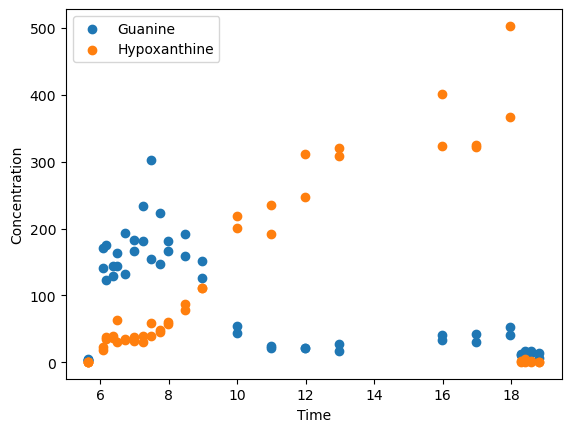

In [18]:
# plotting

# settings
metabolites = ['Guanine', 'Hypoxanthine']

times = 't0_1	t1_1	t2_1	t3_1	t4_1	t5_1	t6_1	t7_1	t8_1	t9_1	t10_1	t11_1	t12_1	t13_1	t14_1	t15_1	t16_1	t17_1	t18_1	t19_1	t20_1	t21_1	t22_1	t23_1	t24_1	t25_1	t26_1	t27_1	t28_1	t29_1	t30_1	t31_1	t32_1	t33_1	t34_1'
hours = '5.65	6.07	6.15	6.38	6.48	6.73	6.98	7.23	7.48	7.73	7.98	8.48	8.98	9.48	9.98	10.48	10.98	11.98	12.98	13.98	14.98	15.98	16.98	17.98	18.18	18.28	18.42	18.58	18.83	19.08	19.33	19.58	20.08	20.58	21.08'
time_to_hours = {k.split('_')[0] : float(v) for k, v in zip(times.split('\t'), hours.split('\t'))}

plt.figure()
for metabolite in metabolites:
    x_vals = []
    y_vals = []
    time_to_vals = {}
    for sample, val in starve_metabs.loc[metabolite][1:].items():
        tim = 't'+str(int(sample.split('__t')[1].split('_')[0]))
        x_vals.append(time_to_hours[tim])
        y_vals.append(val)
        if time_to_hours[tim] not in time_to_vals:
            time_to_vals.update({time_to_hours[tim] : []})
        time_to_vals[time_to_hours[tim]].append(val)
    plt.scatter(x_vals, y_vals, label = metabolite)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()

In [11]:
starve_metabs

,metabolic subsystem,starve_series__t00_growth1__1,starve_series__t00_growth1__2,starve_series__t00_growth1__3,starve_series__t00_growth1__4,starve_series__t01_starve__1,starve_series__t01_starve__2,starve_series__t02_starve__1,starve_series__t02_starve__2,starve_series__t03_starve__1,...,starve_series__t23_growth2__1,starve_series__t23_growth2__2,starve_series__t25_growth2__1,starve_series__t25_growth2__2,starve_series__t26_growth2__1,starve_series__t26_growth2__2,starve_series__t27_growth2__1,starve_series__t27_growth2__2,starve_series__t28_growth2__1,starve_series__t28_growth2__2
Compound,,,,,,,,,,,,,,,,,,,,,
4N/AMethylN/A2N/Aoxovaleric acid (Ketoleucine),NaN,141.34,163.52,110.27,138.13,172.58,155.87,126.61,133.23,115.86,...,228.20,220.29,390.74,364.44,508.15,307.48,334.97,413.33,298.36,263.54
AcetylN/ACoA,Citric Acid Cycle,1189.49,1619.62,1628.01,1584.64,204.22,197.08,235.42,279.48,436.61,...,43.36,41.21,866.56,1339.49,1344.36,917.80,879.70,1077.68,1068.71,1018.43
Adenine,Nucleotide Salvage Pathway,9.06,8.71,9.19,8.98,32.93,41.18,27.79,36.55,9.45,...,48.00,66.30,7.43,6.33,5.51,5.15,4.92,4.62,4.20,4.22
ADP,Purine and Pyrimidine Biosynthesis,225.36,245.50,280.43,282.12,522.71,485.20,731.38,500.30,366.98,...,543.81,583.50,282.66,248.77,208.58,231.85,202.55,216.05,206.17,168.61
Alanine,Alanine and Aspartate Metabolism,357.60,501.92,368.97,354.51,166.93,157.75,125.49,137.67,73.09,...,57.17,57.78,72.89,84.18,188.59,219.45,89.55,99.33,143.48,211.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UDP,Nucleotide Salvage Pathway,140.98,97.69,115.99,129.52,287.68,265.56,488.12,238.80,147.19,...,253.96,340.83,143.24,98.33,92.23,100.82,96.94,151.46,105.49,101.80
UDPN/ANN/AacetylN/ADN/AGlucosamine,Cell Envelope Biosynthesis,724.10,668.50,614.74,676.72,534.49,356.93,334.53,374.12,254.67,...,89.01,91.30,1179.91,1159.60,889.01,850.47,704.72,1210.88,701.31,605.92
UMP,Purine and Pyrimidine Biosynthesis,57.82,95.93,51.65,78.39,259.43,407.97,238.19,237.29,135.33,...,258.57,263.44,131.80,150.40,96.76,148.19,81.86,150.86,60.96,61.82


In [12]:
starve_metabs.columns

Index(['metabolic subsystem', 'starve_series__t00_growth1__1',
       'starve_series__t00_growth1__2', 'starve_series__t00_growth1__3',
       'starve_series__t00_growth1__4', 'starve_series__t01_starve__1',
       'starve_series__t01_starve__2', 'starve_series__t02_starve__1',
       'starve_series__t02_starve__2', 'starve_series__t03_starve__1',
       'starve_series__t03_starve__2', 'starve_series__t04_starve__1',
       'starve_series__t04_starve__2', 'starve_series__t05_starve__1',
       'starve_series__t05_starve__2', 'starve_series__t06_starve__1',
       'starve_series__t06_starve__2', 'starve_series__t07_starve__1',
       'starve_series__t07_starve__2', 'starve_series__t08_starve__1',
       'starve_series__t08_starve__2', 'starve_series__t09_starve__1',
       'starve_series__t09_starve__2', 'starve_series__t10_starve__1',
       'starve_series__t10_starve__2', 'starve_series__t11_starve__1',
       'starve_series__t11_starve__2', 'starve_series__t12_starve__1',
       'sta